# Yet, Another Housing Prices Problem!

## Step #00: Understand the Problem and the Given Data

- Before we delve into the California Housing Prices dataset, **it's essential to take the time to understand the problem at hand and the data we'll be working with**. Properly comprehending the problem and data is critical for ensuring the **accuracy** and **effectiveness** of our machine learning model.

- Here are a **few key points** to keep in mind:

> - **The problem:**
>> - Our goal is to **predict housing prices in California** based on information collected in the 1990 census.
>> - We need to **understand which variables in the dataset may have a significant impact on housing prices**.

> - **The data:**
>> - The dataset contains a **range of variables**, including median house values, household income, location, and more.
>> - We need to examine the data to understand its **quality**, **potential biases**, and **any missing or irrelevant data** that may impact the model's accuracy.

> - **Data limitations:**
>> - It's important to **understand the limitations of the data we're working with**, as it was collected in 1990. We need to be mindful of any changes that have occurred since then and how these changes may affect our model's accuracy.

- By understanding the **problem** and** data**, we can better prepare ourselves for the subsequent steps of data **exploration**, **cleaning**, and **analysis**.
- **With a solid foundation in place, we can build an accurate and effective machine learning model!**

## Step #01: Set up the Workspace:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## Step #02: Data Wrangling

### Get the data

- **Read the data:**

In [2]:
cal_housing_prices = pd.read_csv("./datasets/housing.csv")

### Assess & clean the data

- **Explore its shape & size:**

In [3]:
cal_housing_prices.shape

(20640, 10)

- **Print the first few rows to get a sense of the data:**

In [4]:
cal_housing_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- **View some metadata:**

In [5]:
cal_housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- **View some summary statistics & viz:**

In [6]:
cal_housing_prices.drop(columns=["longitude", "latitude"]).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


- **Plot the distribution of numerical columns (to choose a suitable scaling technique later on):**

In [7]:
# List all numerical columns except the target & redundant ones:
cols = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]

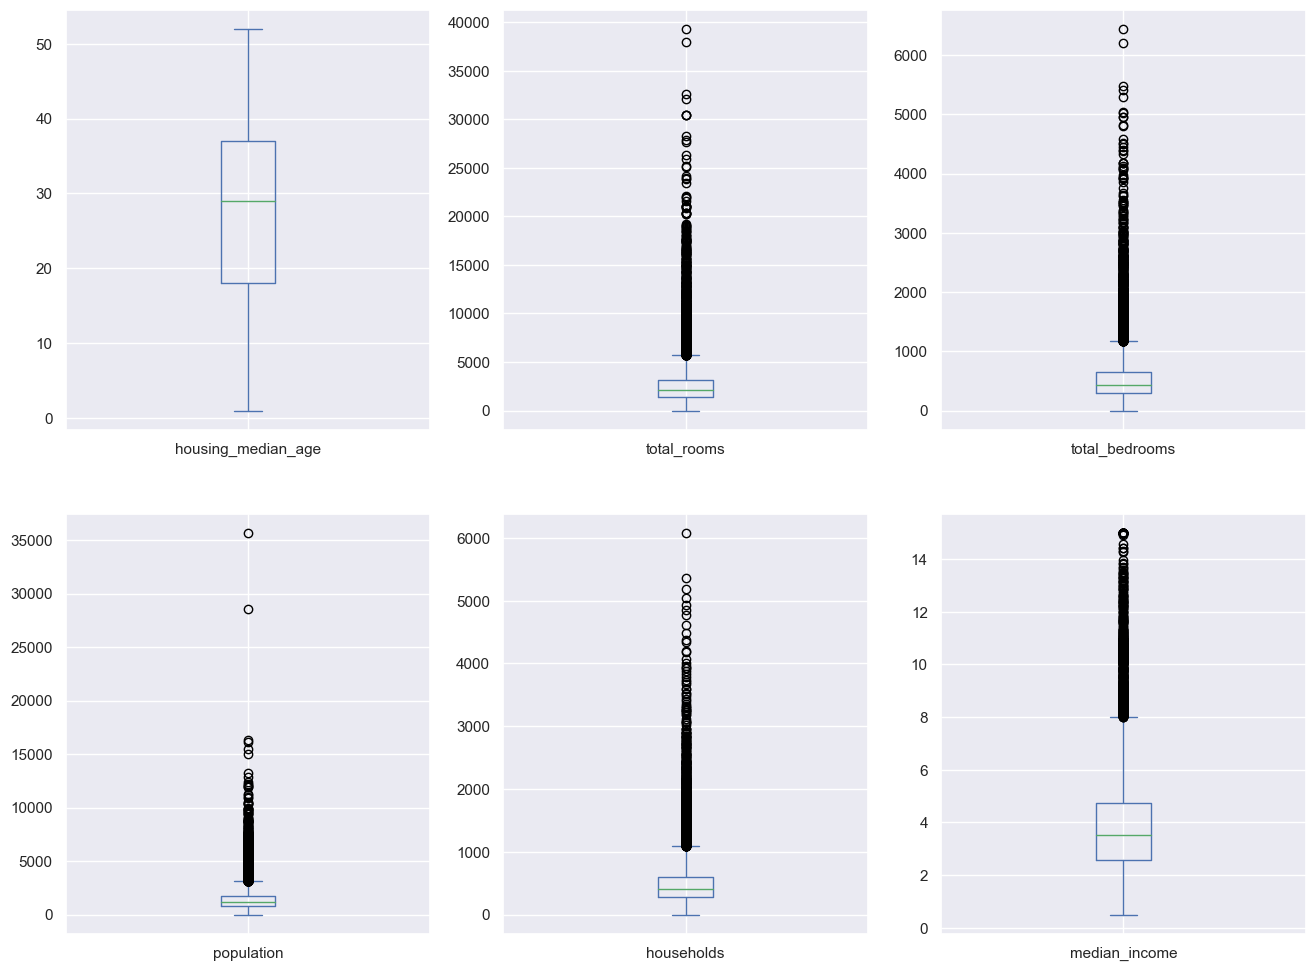

In [8]:
# Plot the distrubution of all numerical columns (except the target):
fig, axs = plt.subplots(2, 3, figsize=(16, 12))
axs = axs.flatten()
for col, ax in zip(cols, axs):
    cal_housing_prices[col].plot.box(ax=ax)

- **Further assessing:**

> - Is there any duplicates?

In [9]:
cal_housing_prices.duplicated().sum()

0

> - Is there any missing values?

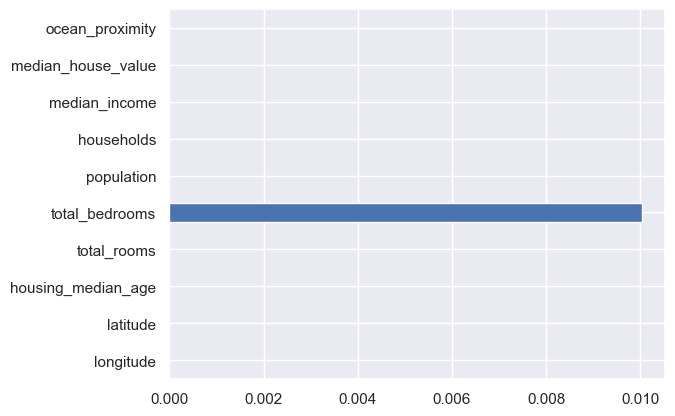

In [10]:
cal_housing_prices.isna().mean().plot.barh();

> - Check the cardinality of `ocean_proximity` column:

In [11]:
cal_housing_prices["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

- **Note that:**
> - Sone columns may be **redundant**:
>> - `lingitude` & `latitude`,
> - There is **no duplicates**,
> - There is **some missing values**,
>> - Can be **dropped**,
> - Some columns may **need further processing**:
>> - `ocean_proximity`: **`object` --> 'category'**,
>> - Numerical columns --> **scaling**.

- **Data cleaning and preprocessing:**

In [12]:
# Drop the redundant columns:
cal_housing_prices.drop(columns=["longitude", "latitude"], inplace=True)

In [13]:
# Drop all rows with missing values:
cal_housing_prices.dropna(inplace=True)

In [14]:
# Memory usage for ocean_proximity column:
(a := cal_housing_prices["ocean_proximity"].memory_usage())
print(f"Memory usage in kilobytes: {a / 1024}")

Memory usage in kilobytes: 319.265625


In [15]:
# Convert ocean_proximity to category & calculate difference in memory_usage:
cal_housing_prices["ocean_proximity"] = cal_housing_prices["ocean_proximity"].astype("category")
(b := cal_housing_prices["ocean_proximity"].memory_usage())
print(f"Difference in memory usage in kilobytes: {(a - b) / 1024}")

Difference in memory usage in kilobytes: 139.4716796875


## Step #03: Exploratory Data Analysis

### Screen the distribution of univariate numerical variables & the relationship between them all at one:

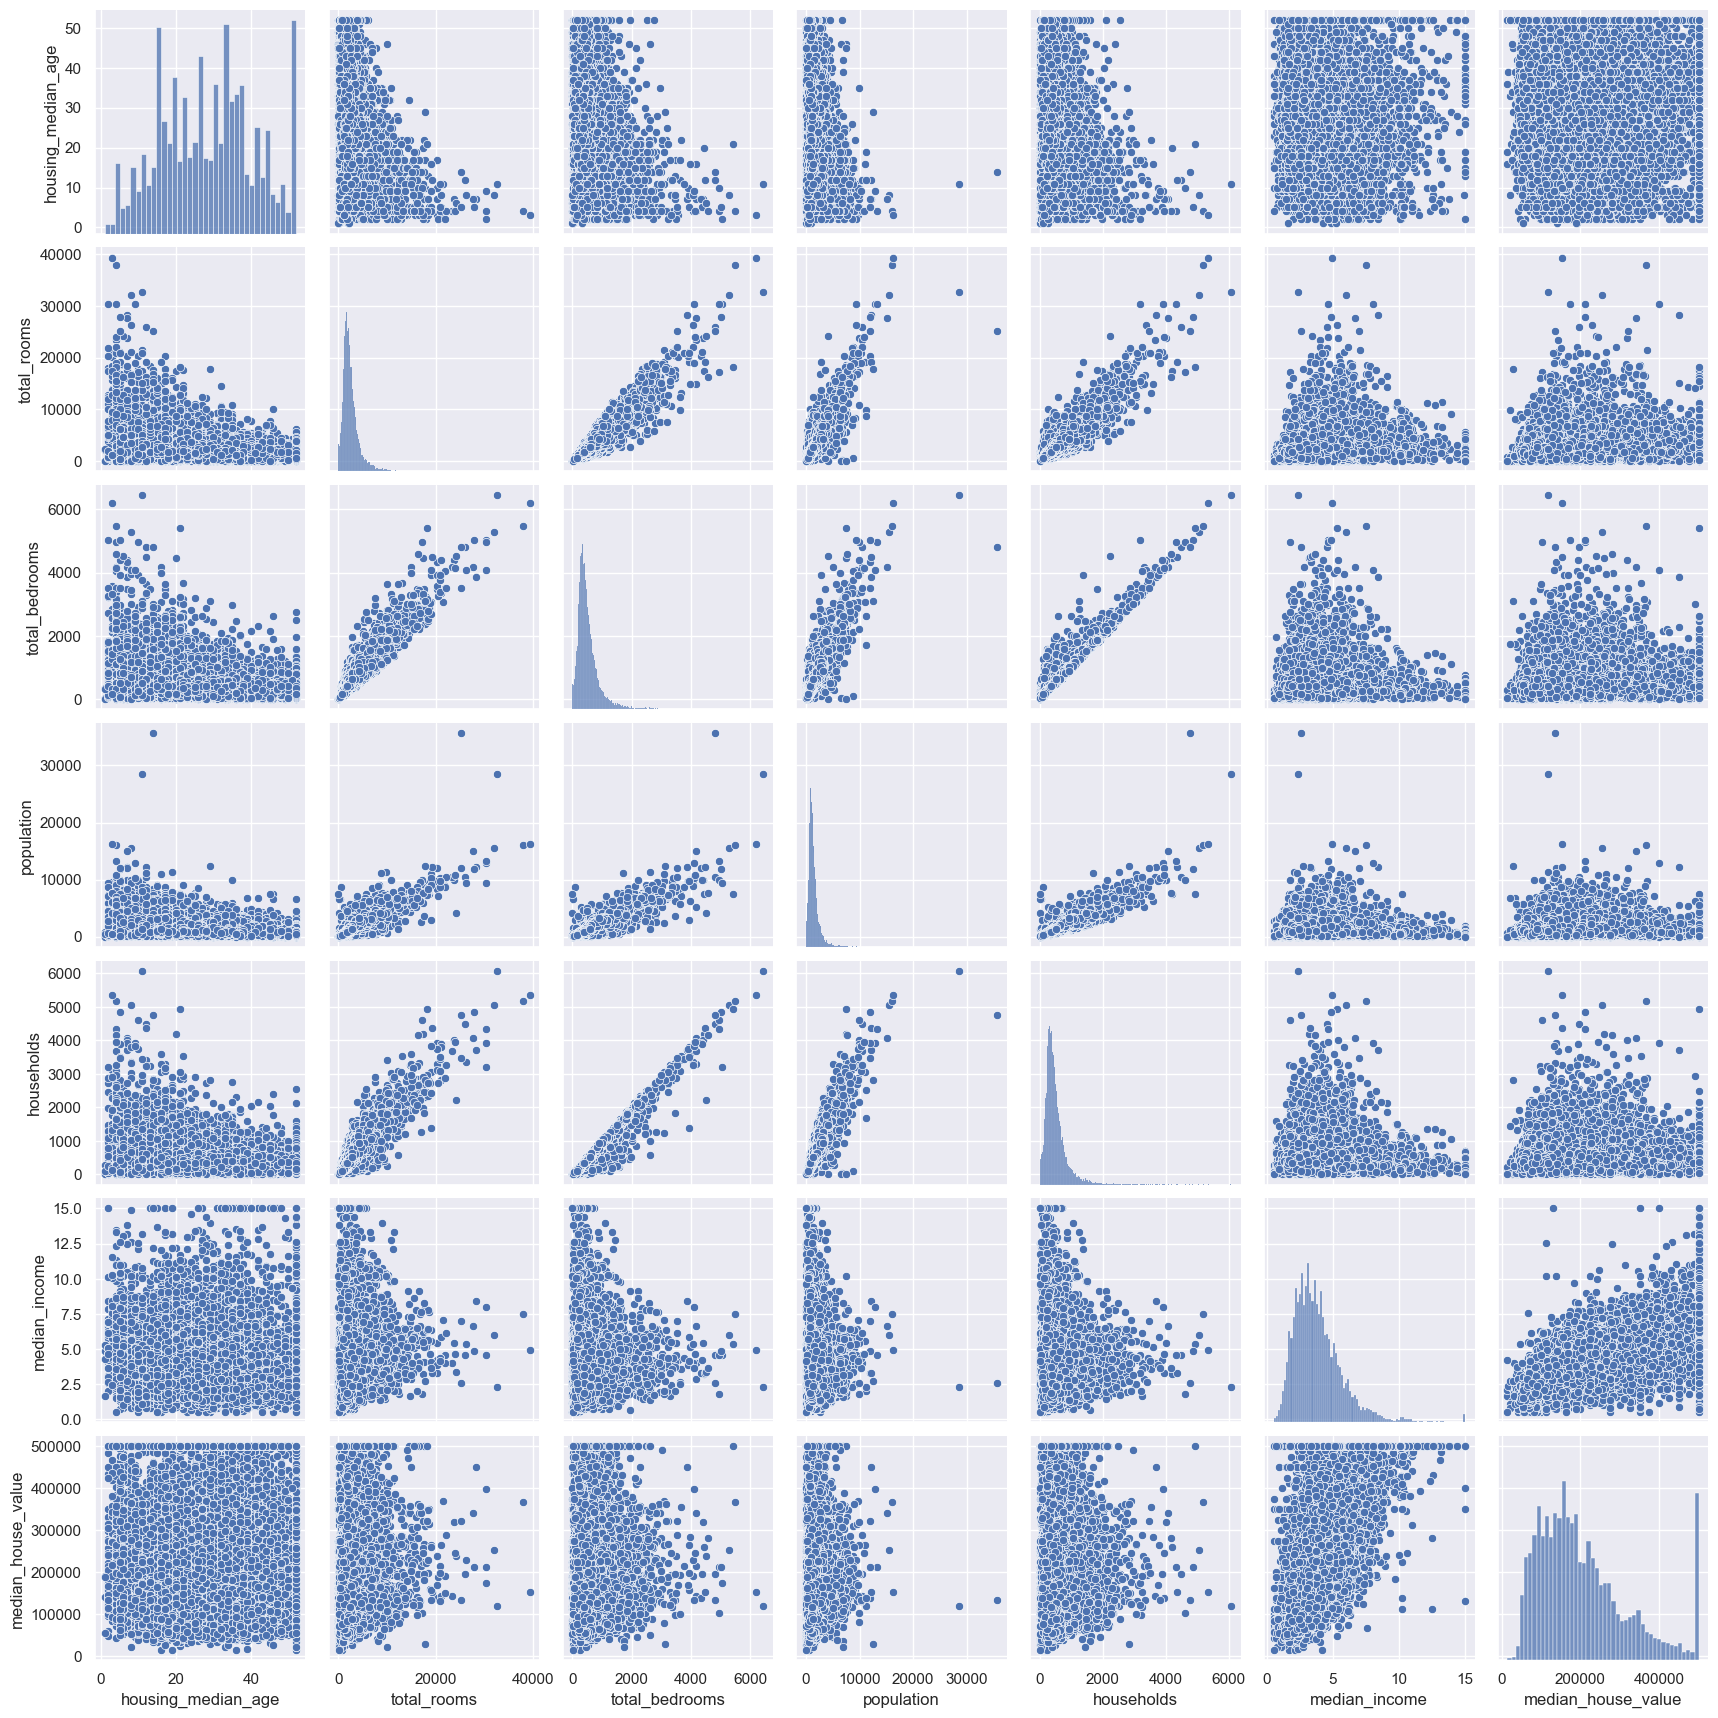

In [16]:
# Screen the data using seaborn paiplot:
sns.pairplot(cal_housing_prices);

## Step #04: Explanatory Data Analysis

## Step #05: Predict Housing Prices

### Furthe data preprocessing

- **Encode categorical variables:**

In [17]:
cal_housing_prices.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
cal_housing_prices_encoded = pd.get_dummies(
    data=cal_housing_prices,
    columns=["ocean_proximity"],
    prefix="",
    prefix_sep="",
    dtype=int
)

In [19]:
cal_housing_prices_encoded.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [20]:
# Performing log-transformation:
cal_housing_prices_encoded_transformed = cal_housing_prices_encoded.apply(lambda x: np.log(x + 1))

- **Split the data into features & target:**

In [21]:
X = cal_housing_prices_encoded_transformed.drop(columns="median_house_value")
y = cal_housing_prices_encoded_transformed["median_house_value"]

- **Create a hold-out set:**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **Feature scaling:**

In [23]:
# Create a robust scaler:
scaler = RobustScaler()

In [24]:
# Fit to & transform the training set:
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
# Transform the training set:
X_test_scaled = scaler.transform(X_test)

### Model selection:

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [26]:
# Define a scoring function:
scorer = make_scorer(r2_score, greater_is_better=True)

For dummy_reg, results are:
  min = -0.07%
  mean = -0.03%
  max = -0.00%

For linear_reg, results are:
  min = 66.71%
  mean = 68.03%
  max = 69.47%

For tree_reg, results are:
  min = 46.32%
  mean = 47.84%
  max = 49.80%

For support_vector_reg, results are:
  min = 66.40%
  mean = 67.69%
  max = 69.29%

For random_forest_reg, results are:
  min = 71.67%
  mean = 72.23%
  max = 73.40%

For adaboost_linear_reg, results are:
  min = 66.71%
  mean = 68.03%
  max = 69.47%

For adaboost_tree_reg, results are:
  min = 55.10%
  mean = 58.45%
  max = 60.59%



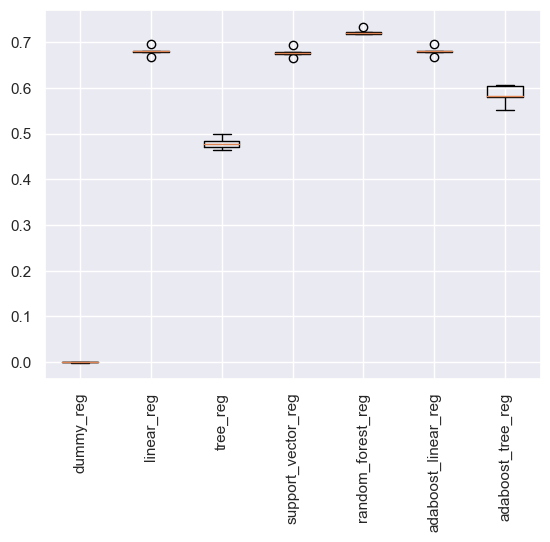

CPU times: total: 9min 17s
Wall time: 9min 20s


In [27]:
%%time
# Compare different models:
%run "./helpers/validate_model.py";
results = compare_models(
    X_train_scaled, y_train, scorer,
    dummy_reg=DummyRegressor(),
    linear_reg=LinearRegression(),
    tree_reg=DecisionTreeRegressor(),
    support_vector_reg=SVR(kernel="linear"),
    random_forest_reg=RandomForestRegressor(),
    adaboost_linear_reg=LinearRegression(),
    adaboost_tree_reg=AdaBoostRegressor()
);